# Simple Linear Regression

## `NOTE`
- Only we should fit and transform our X_train
- We should only transform our X_test # Because if we fit our X_test this will calculate Z-Score formula and after this will apply in our all the values
- We should not neither fit nor transform our y_train and y_test # because these are dependent feature

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # to Divide our dataset into train and test
from sklearn.preprocessing import  StandardScaler # to scale our data
from sklearn.linear_model import LinearRegression #  to train our model
from sklearn.metrics import mean_squared_error,mean_absolute_error #  for Checking error
from sklearn.metrics import r2_score # for Checking Accuracy 

In [28]:
df = pd.read_csv('height-weight.csv')
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0.5, 1.0, 'Regression')

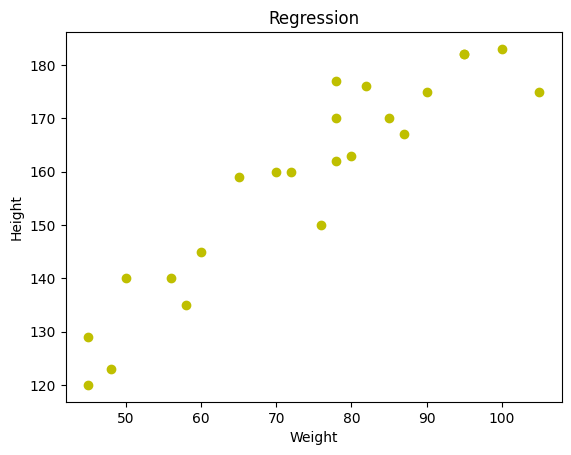

In [29]:
plt.scatter(df['Weight'],y=df['Height'],c='y')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Regression')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [31]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


## Dividing our dataset into dependent and independent features

In [32]:
X = df[['Weight']] #independent feature # this X should be 2D array 
y = df['Height'] # dependent feature # Our y should be Series 

In [33]:
y.shape,X.shape

((23,), (23, 1))

## Divide our dataset to train and test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [36]:
y_train.shape,y_test.shape

((18,), (5,))

 ## Standard Scaling on the train and test data
  to minimize the range of our data So that our convergence algorithm could perform well and our data point can easily reach to global minima

In [37]:
scaler = StandardScaler()
scaler

StandardScaler()

In [38]:
X_train=scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

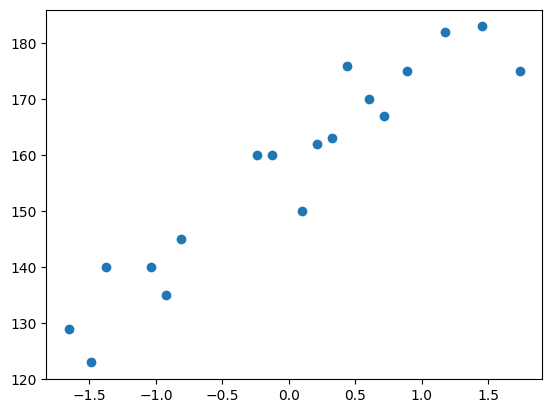

In [40]:
plt.scatter(X_train,y_train)

## Model training

### Process
1 ) making object # if we don't give any parameters values the object takes its default values
2 ) 

In [41]:
regressor = LinearRegression(n_jobs=-1)
regressor

LinearRegression(n_jobs=-1)

In [42]:
# Training the train data
regressor.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [43]:
# intercept of best fit line
regressor.intercept_

157.5

In [44]:
# Slope Or coefficient of best fit line
regressor.coef_ 

array([17.03440872])

### Seeing the best fit line

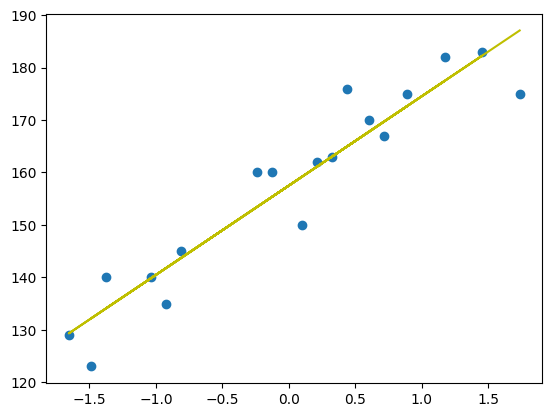

In [45]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'y')

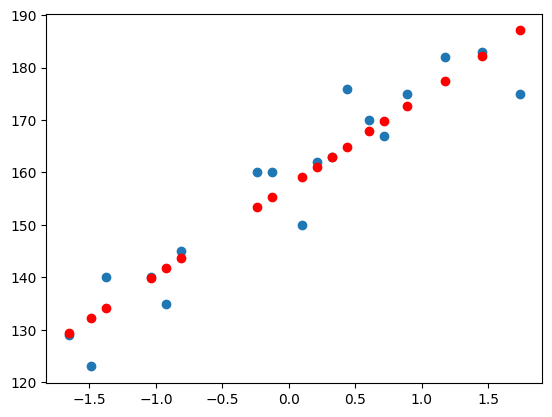

In [46]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regressor.predict(X_train),c='r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

## Prediction for test data

In [47]:
y_pred_test = regressor.predict(X_test)

In [48]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [49]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

## Checking error of Model(means the difference actual data point and predicted data point)
### to calculate this we do use `Performance Metrics` - we use in this - `MAE , MSE , RMSE `

In [50]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## Checking Accuracy of the model
### to calculate this we use` Performance Metrics` - we use in this - `R Squared , Ajdusted R Squared`

### R square 
Formula

**R^2 = 1 - SSR/SST**


- R^2	=	Accuracy of the model
- SSR	=	sum of squares of residuals
- SST	=	total sum of squares

In [51]:
score_r2 = r2_score(y_true=y_test,y_pred=y_pred_test)
score_r2
# In linear regression this score is very good

0.776986986042344

### Adjusted r square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [52]:
score_Adjusted_r2 =1-(1-score_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
score_Adjusted_r2

0.7026493147231252